<a href="https://colab.research.google.com/github/Mc4minta/AIB5-PcapAttackClassifier/blob/main/GeneratedLabelFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount google drive to access files in it
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# import data as csv and preprocess

In [ ]:
import pandas as pd
import numpy as np
import os

# csv_dir = 'CIC-IDS-2017/CSVs/MachineLearningCSV/MachineLearningCVE'
csv_dir = '/content/drive/MyDrive/Share to Mc4/AIBuilders5-MiN/GeneratedLabelledFlows/TrafficLabelling'

csv_files = [
    'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
    'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
    'Friday-WorkingHours-Morning.pcap_ISCX.csv',
    'Monday-WorkingHours.pcap_ISCX.csv',
    # 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
    'Tuesday-WorkingHours.pcap_ISCX.csv',
    'Wednesday-workingHours.pcap_ISCX.csv',
    # 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv'
]

dfs = []

for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    try:
        df = pd.read_csv(file_path)
        dfs.append(df)
        print(f"Successfully loaded: {file}")
    except FileNotFoundError:
        print(f"File not found: {file}")

df = pd.concat(dfs, ignore_index=True)
df.columns = df.columns.str.strip().str.replace(' ', '_')

columns_to_drop = [
    'Flow_ID','Source_IP','Destination_IP','Protocol','Timestamp','Fwd_Header_Length.1',
]

df = df.drop(columns=columns_to_drop)

df.replace([np.inf, -np.inf], np.nan, inplace = True)
df = df.dropna()

df.head()

Successfully loaded: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Successfully loaded: Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Successfully loaded: Friday-WorkingHours-Morning.pcap_ISCX.csv
Successfully loaded: Monday-WorkingHours.pcap_ISCX.csv
Successfully loaded: Tuesday-WorkingHours.pcap_ISCX.csv
Successfully loaded: Wednesday-workingHours.pcap_ISCX.csv


,Source_Port,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,443,54865,3,2,0,12.0,0.0,6.0,6.0,6.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,80,55054,109,1,1,6.0,6.0,6.0,6.0,6.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,80,55055,52,1,1,6.0,6.0,6.0,6.0,6.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,443,46236,34,1,1,6.0,6.0,6.0,6.0,6.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,443,54863,3,2,0,12.0,0.0,6.0,6.0,6.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [ ]:
columns_mapping = {
    'Src_Port': 'Source_Port',
    'Dst_Port': 'Destination_Port',
    'Flow_Duration': 'Flow_Duration',
    'Tot_Fwd_Pkts': 'Total_Fwd_Packets',
    'Tot_Bwd_Pkts': 'Total_Backward_Packets',
    'TotLen_Fwd_Pkts': 'Total_Length_of_Fwd_Packets',
    'TotLen_Bwd_Pkts': 'Total_Length_of_Bwd_Packets',
    'Fwd_Pkt_Len_Max': 'Fwd_Packet_Length_Max',
    'Fwd_Pkt_Len_Min': 'Fwd_Packet_Length_Min',
    'Fwd_Pkt_Len_Mean': 'Fwd_Packet_Length_Mean',
    'Fwd_Pkt_Len_Std': 'Fwd_Packet_Length_Std',
    'Bwd_Pkt_Len_Max': 'Bwd_Packet_Length_Max',
    'Bwd_Pkt_Len_Min': 'Bwd_Packet_Length_Min',
    'Bwd_Pkt_Len_Mean': 'Bwd_Packet_Length_Mean',
    'Bwd_Pkt_Len_Std': 'Bwd_Packet_Length_Std',
    'Flow_Byts/s': 'Flow_Bytes/s',
    'Flow_Pkts/s': 'Flow_Packets/s',
    'Flow_IAT_Mean': 'Flow_IAT_Mean',
    'Flow_IAT_Std': 'Flow_IAT_Std',
    'Flow_IAT_Max': 'Flow_IAT_Max',
    'Flow_IAT_Min': 'Flow_IAT_Min',
    'Fwd_IAT_Tot': 'Fwd_IAT_Total',
    'Fwd_IAT_Mean': 'Fwd_IAT_Mean',
    'Fwd_IAT_Std': 'Fwd_IAT_Std',
    'Fwd_IAT_Max': 'Fwd_IAT_Max',
    'Fwd_IAT_Min': 'Fwd_IAT_Min',
    'Bwd_IAT_Tot': 'Bwd_IAT_Total',
    'Bwd_IAT_Mean': 'Bwd_IAT_Mean',
    'Bwd_IAT_Std': 'Bwd_IAT_Std',
    'Bwd_IAT_Max': 'Bwd_IAT_Max',
    'Bwd_IAT_Min': 'Bwd_IAT_Min',
    'Fwd_PSH_Flags': 'Fwd_PSH_Flags',
    'Bwd_PSH_Flags': 'Bwd_PSH_Flags',
    'Fwd_URG_Flags': 'Fwd_URG_Flags',
    'Bwd_URG_Flags': 'Bwd_URG_Flags',
    'Fwd_Header_Len': 'Fwd_Header_Length',
    'Bwd_Header_Len': 'Bwd_Header_Length',
    'Fwd_Pkts/s': 'Fwd_Packets/s',
    'Bwd_Pkts/s': 'Bwd_Packets/s',
    'Pkt_Len_Min': 'Min_Packet_Length',
    'Pkt_Len_Max': 'Max_Packet_Length',
    'Pkt_Len_Mean': 'Packet_Length_Mean',
    'Pkt_Len_Std': 'Packet_Length_Std',
    'Pkt_Len_Var': 'Packet_Length_Variance',
    'FIN_Flag_Cnt': 'FIN_Flag_Count',
    'SYN_Flag_Cnt': 'SYN_Flag_Count',
    'RST_Flag_Cnt': 'RST_Flag_Count',
    'PSH_Flag_Cnt': 'PSH_Flag_Count',
    'ACK_Flag_Cnt': 'ACK_Flag_Count',
    'URG_Flag_Cnt': 'URG_Flag_Count',
    'CWE_Flag_Count': 'CWE_Flag_Count',
    'ECE_Flag_Cnt': 'ECE_Flag_Count',
    'Down/Up_Ratio': 'Down/Up_Ratio',
    'Pkt_Size_Avg': 'Average_Packet_Size',
    'Fwd_Seg_Size_Avg': 'Avg_Fwd_Segment_Size',
    'Bwd_Seg_Size_Avg': 'Avg_Bwd_Segment_Size',
    'Fwd_Byts/b_Avg': 'Fwd_Byts/b_Avg',
    'Fwd_Pkts/b_Avg': 'Fwd_Pkts/b_Avg',
    'Fwd_Blk_Rate_Avg': 'Fwd_Blk_Rate_Avg',
    'Bwd_Byts/b_Avg': 'Bwd_Byts/b_Avg',
    'Bwd_Pkts/b_Avg': 'Bwd_Pkts/b_Avg',
    'Bwd_Blk_Rate_Avg': 'Bwd_Blk_Rate_Avg',
    'Subflow_Fwd_Pkts': 'Subflow_Fwd_Pkts',
    'Subflow_Fwd_Byts': 'Subflow_Fwd_Byts',
    'Subflow_Bwd_Pkts': 'Subflow_Bwd_Pkts',
    'Subflow_Bwd_Byts': 'Subflow_Bwd_Byts',
    'Init_Fwd_Win_Byts': 'Init_Fwd_Win_Byts',
    'Init_Bwd_Win_Byts': 'Init_Bwd_Win_Byts',
    'Fwd_Act_Data_Pkts': 'act_data_pkt_fwd',
    'Fwd_Seg_Size_Min': 'Fwd_Seg_Size_Min',
    'Active_Mean': 'Active_Mean',
    'Active_Std': 'Active_Std',
    'Active_Max': 'Active_Max',
    'Active_Min': 'Active_Min',
    'Idle_Mean': 'Idle_Mean',
    'Idle_Std': 'Idle_Std',
    'Idle_Max': 'Idle_Max',
    'Idle_Min': 'Idle_Min'
}


df = df.rename(columns=columns_mapping)
df = df.dropna()
df.head()

# process label columns

In [ ]:
df['Label'].value_counts()

In [ ]:
# Remove unused attacks rows
values_to_remove = ['Bot', 'Heartbleed']
df = df[~df['Label'].isin(values_to_remove)]
df = df.reset_index(drop=True)
df['Label'].value_counts()

In [ ]:
# Groupped DOS Labels and rename FTP and SSH to be bruteforce
label_mapping = {
    'BENIGN': 'Benign',
    'DoS Hulk': 'DoS',
    'DDoS': 'DDoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan' : 'PortScan',
    'FTP-Patator': 'FTP-Bruteforce',
    'SSH-Patator': 'SSH-Bruteforce',
}

# Apply the label mapping to the 'Label' column
df['Label'] = df['Label'].map(label_mapping)
df['Label'].value_counts()

In [ ]:
df

# Try to remove duplicate benign values

In [ ]:
df['Label'].value_counts()

In [ ]:
df = df[~((df['Label'] == 'Benign') & df.duplicated())]
df['Label'].value_counts()

# Model Traning

In [ ]:
df['Label'].value_counts()

In [ ]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [ ]:
# split label and data
X = df.drop('Label', axis=1)
y = df['Label']

# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
y_train.value_counts()

,count
Label,
Benign,1446608
DoS,201436
PortScan,127267
DDoS,102090
FTP-Bruteforce,6368
SSH-Bruteforce,4719


In [ ]:
# drop some dataframe to freed ram
df = df[[]]
X = X[[]]
y = y[[]]

In [ ]:
model = RandomForestClassifier(n_estimators=400, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("execution finished")

execution finished


In [ ]:
y_pred

array(['Benign', 'Benign', 'DoS', ..., 'PortScan', 'Benign', 'DoS'],
      dtype=object)

# Save model as file

In [ ]:
import joblib

joblib.dump(model, '/content/drive/MyDrive/Share to Mc4/AIBuilders5-MiN/GeneratedLabelFlow.pkl')
# model = joblib.load('/content/drive/MyDrive/Share to Mc4/AIBuilders5-MiN/GeneratedLabelFlow.pkl')

['/content/drive/MyDrive/Share to Mc4/AIBuilders5-MiN/GeneratedLabelFlow.pkl']

# Visulize result

Accuracy: 0.9997
Recall for Benign: 0.9998
Recall for DoS: 0.9997
Recall for PortScan: 0.9989
Recall for DDoS: 1.0000
Recall for SSH-Bruteforce: 0.9998
Recall for FTP-Bruteforce: 0.9975

Overall Recall (Macro Average): 0.9993


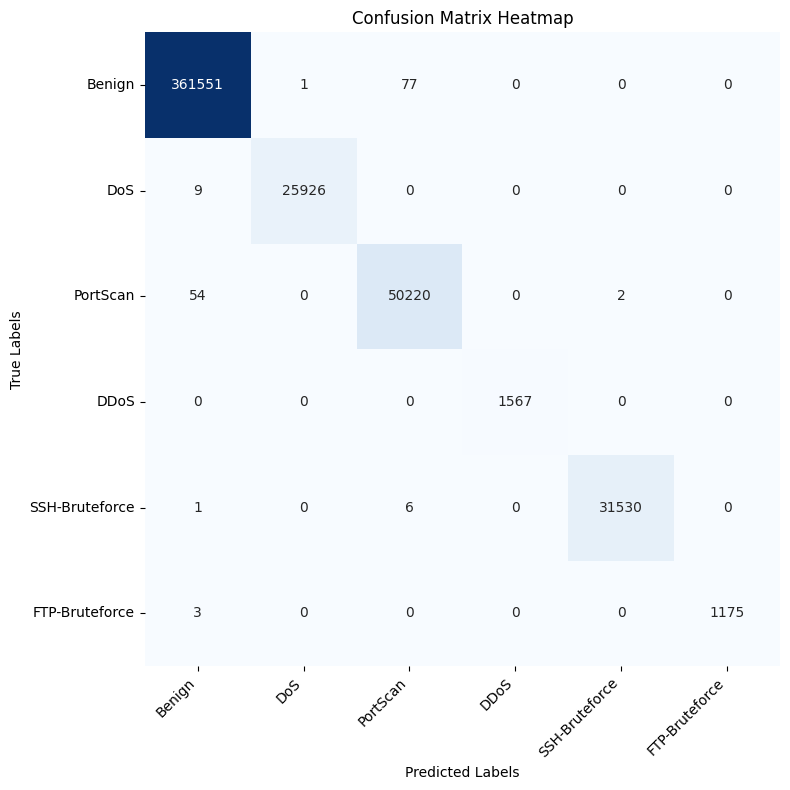

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

target_names = y_train.unique()
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

recall_per_class = recall_score(y_test, y_pred, average=None)  # average=None for per-class scores
for i, class_name in enumerate(target_names):
    print(f"Recall for {class_name}: {recall_per_class[i]:.4f}")

# Print overall recall (macro average)
overall_recall = recall_score(y_test, y_pred, average='macro')  # macro average
print(f"\nOverall Recall (Macro Average): {overall_recall:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 8)) # Increase figure size for better readability
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=target_names, yticklabels=target_names)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better visibility
plt.yticks(rotation=0) # Keep y-axis labels vertical
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()